In [59]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [60]:
folder = "/Users/nickphelps/Desktop/2023 12 07/18C/18C analysis logs"

In [61]:
def get_sorted_file_names_in_folder(folder_path):
    file_names = []

    # Check if the provided path is a directory
    if not os.path.isdir(folder_path):
        print(f"{folder_path} is not a valid directory.")
        return file_names

    # Iterate through all files in the directory
    for filename in os.listdir(folder_path):
        if filename.lower() == ".ds_store":
            continue  # Skip .DS_Store file

        file_path = os.path.join(folder_path, filename)

        # Check if the path is a file (not a directory)
        if os.path.isfile(file_path):
            file_names.append(filename)

    # Sort file names based on the number after "cap" in a case-insensitive manner
    file_names.sort(key=lambda x: int(x.split('_')[0][3:].lower()))

    return file_names

In [183]:
mean_vf_array_list = []
median_vf_array_list = []

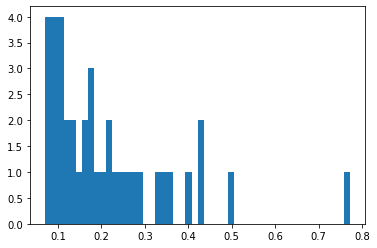

mean: 0.2122685123709119, median: 0.1703821575447033


In [210]:
temp = "36C"
folder = f"/Users/nickphelps/Desktop/2023 12 07/{temp}/{temp} analysis logs"

folder_contents = get_sorted_file_names_in_folder(folder)

df_list = []
for file in folder_contents:
    df = pd.read_csv(f"{folder}/{file}")
    df_list.append(df)
    
rmse_thresh = 80

mean_vf_array = np.zeros(len(df_list))
median_vf_array = np.zeros(len(df_list))

for index, df in enumerate(df_list):
    rmse = df["RMSE"].to_numpy()
    rden_u = df["fit rDen uncertainty"].to_numpy()
    rden_vdil_vf = df["fit den, voronoi dil vf"].to_numpy()

    filt = np.where(rmse < rmse_thresh, 1, 0) * np.where(rden_u < 0.1, 1, 0) * np.where(rden_vdil_vf < 0.8, 1, 0) * np.where(rden_vdil_vf > 0.001, 1, 0)
    intermediate = rden_vdil_vf * filt
    finite = intermediate[np.isfinite(intermediate)]
    nz = finite.nonzero()
    nonzero = finite[nz]
    post_filter = nonzero
    
    count, bins = np.histogram(post_filter, 50)
    plt.stairs(count, bins, fill = True)
    plt.show()

    mean = np.mean(post_filter)
    median = np.median(post_filter)
    
    mean_vf_array[index] = mean
    median_vf_array[index] = median
    
    print(f"mean: {mean}, median: {median}")
    
mean_vf_array_list.append(mean_vf_array)
median_vf_array_list.append(median_vf_array)

In [262]:
median_vf_array = median_vf_array_list

In [263]:
conc_array = np.array([10, 135, 50, 90, 30, 70, 20])

ValueError: x and y must have same first dimension, but have shapes (7,) and (20, 7)

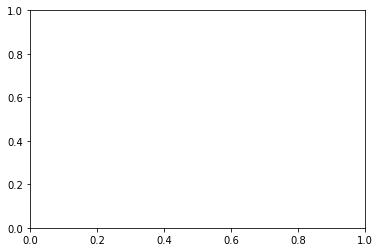

In [264]:
plt.plot(conc_array, median_vf_array, linestyle ="", marker ="o")

In [ ]:
from scipy.optimize import curve_fit

In [301]:
temp_li = [18, 20, 24, 26, 26.5, 27, 27.5, 28, 28.5, 29, 29.5, 30.5, 31, 31.5, 32, 32.5, 33, 33.5, 34.0, 35.0]

NS dil: -32.77268768904088, NS den: 354.5395270544692
NS dil: -32.341544947035835, NS den: 340.99683829389755
NS dil: -29.51223672842368, NS den: 323.38823751435723
NS dil: -21.71571718250948, NS den: 295.229007166207
NS dil: -20.44634217398138, NS den: 287.3530571375509
NS dil: -18.20452317958508, NS den: 280.75347333412043
NS dil: -21.137685188439434, NS den: 279.2439014758055
NS dil: -16.831067958709507, NS den: 268.8788490069777
NS dil: -14.92112146951605, NS den: 258.09026336711025
NS dil: -22.599086141239017, NS den: 296.4036312128862
NS dil: -19.015832087601527, NS den: 290.48118331391174
NS dil: -55.11014994133287, NS den: 499.65171510208245
NS dil: -70.70247176743702, NS den: 590.5115173877464
NS dil: -123.52404774753133, NS den: 784.0019198259314
NS dil: -129.48111652944385, NS den: 745.1808010707128
NS dil: -707.6972390436365, NS den: 2764.361458185439
NS dil: -629.8786674961513, NS den: 2341.5773800813645
NS dil: -188.62304724739047, NS den: 918.9125158884001
NS dil: -314.7

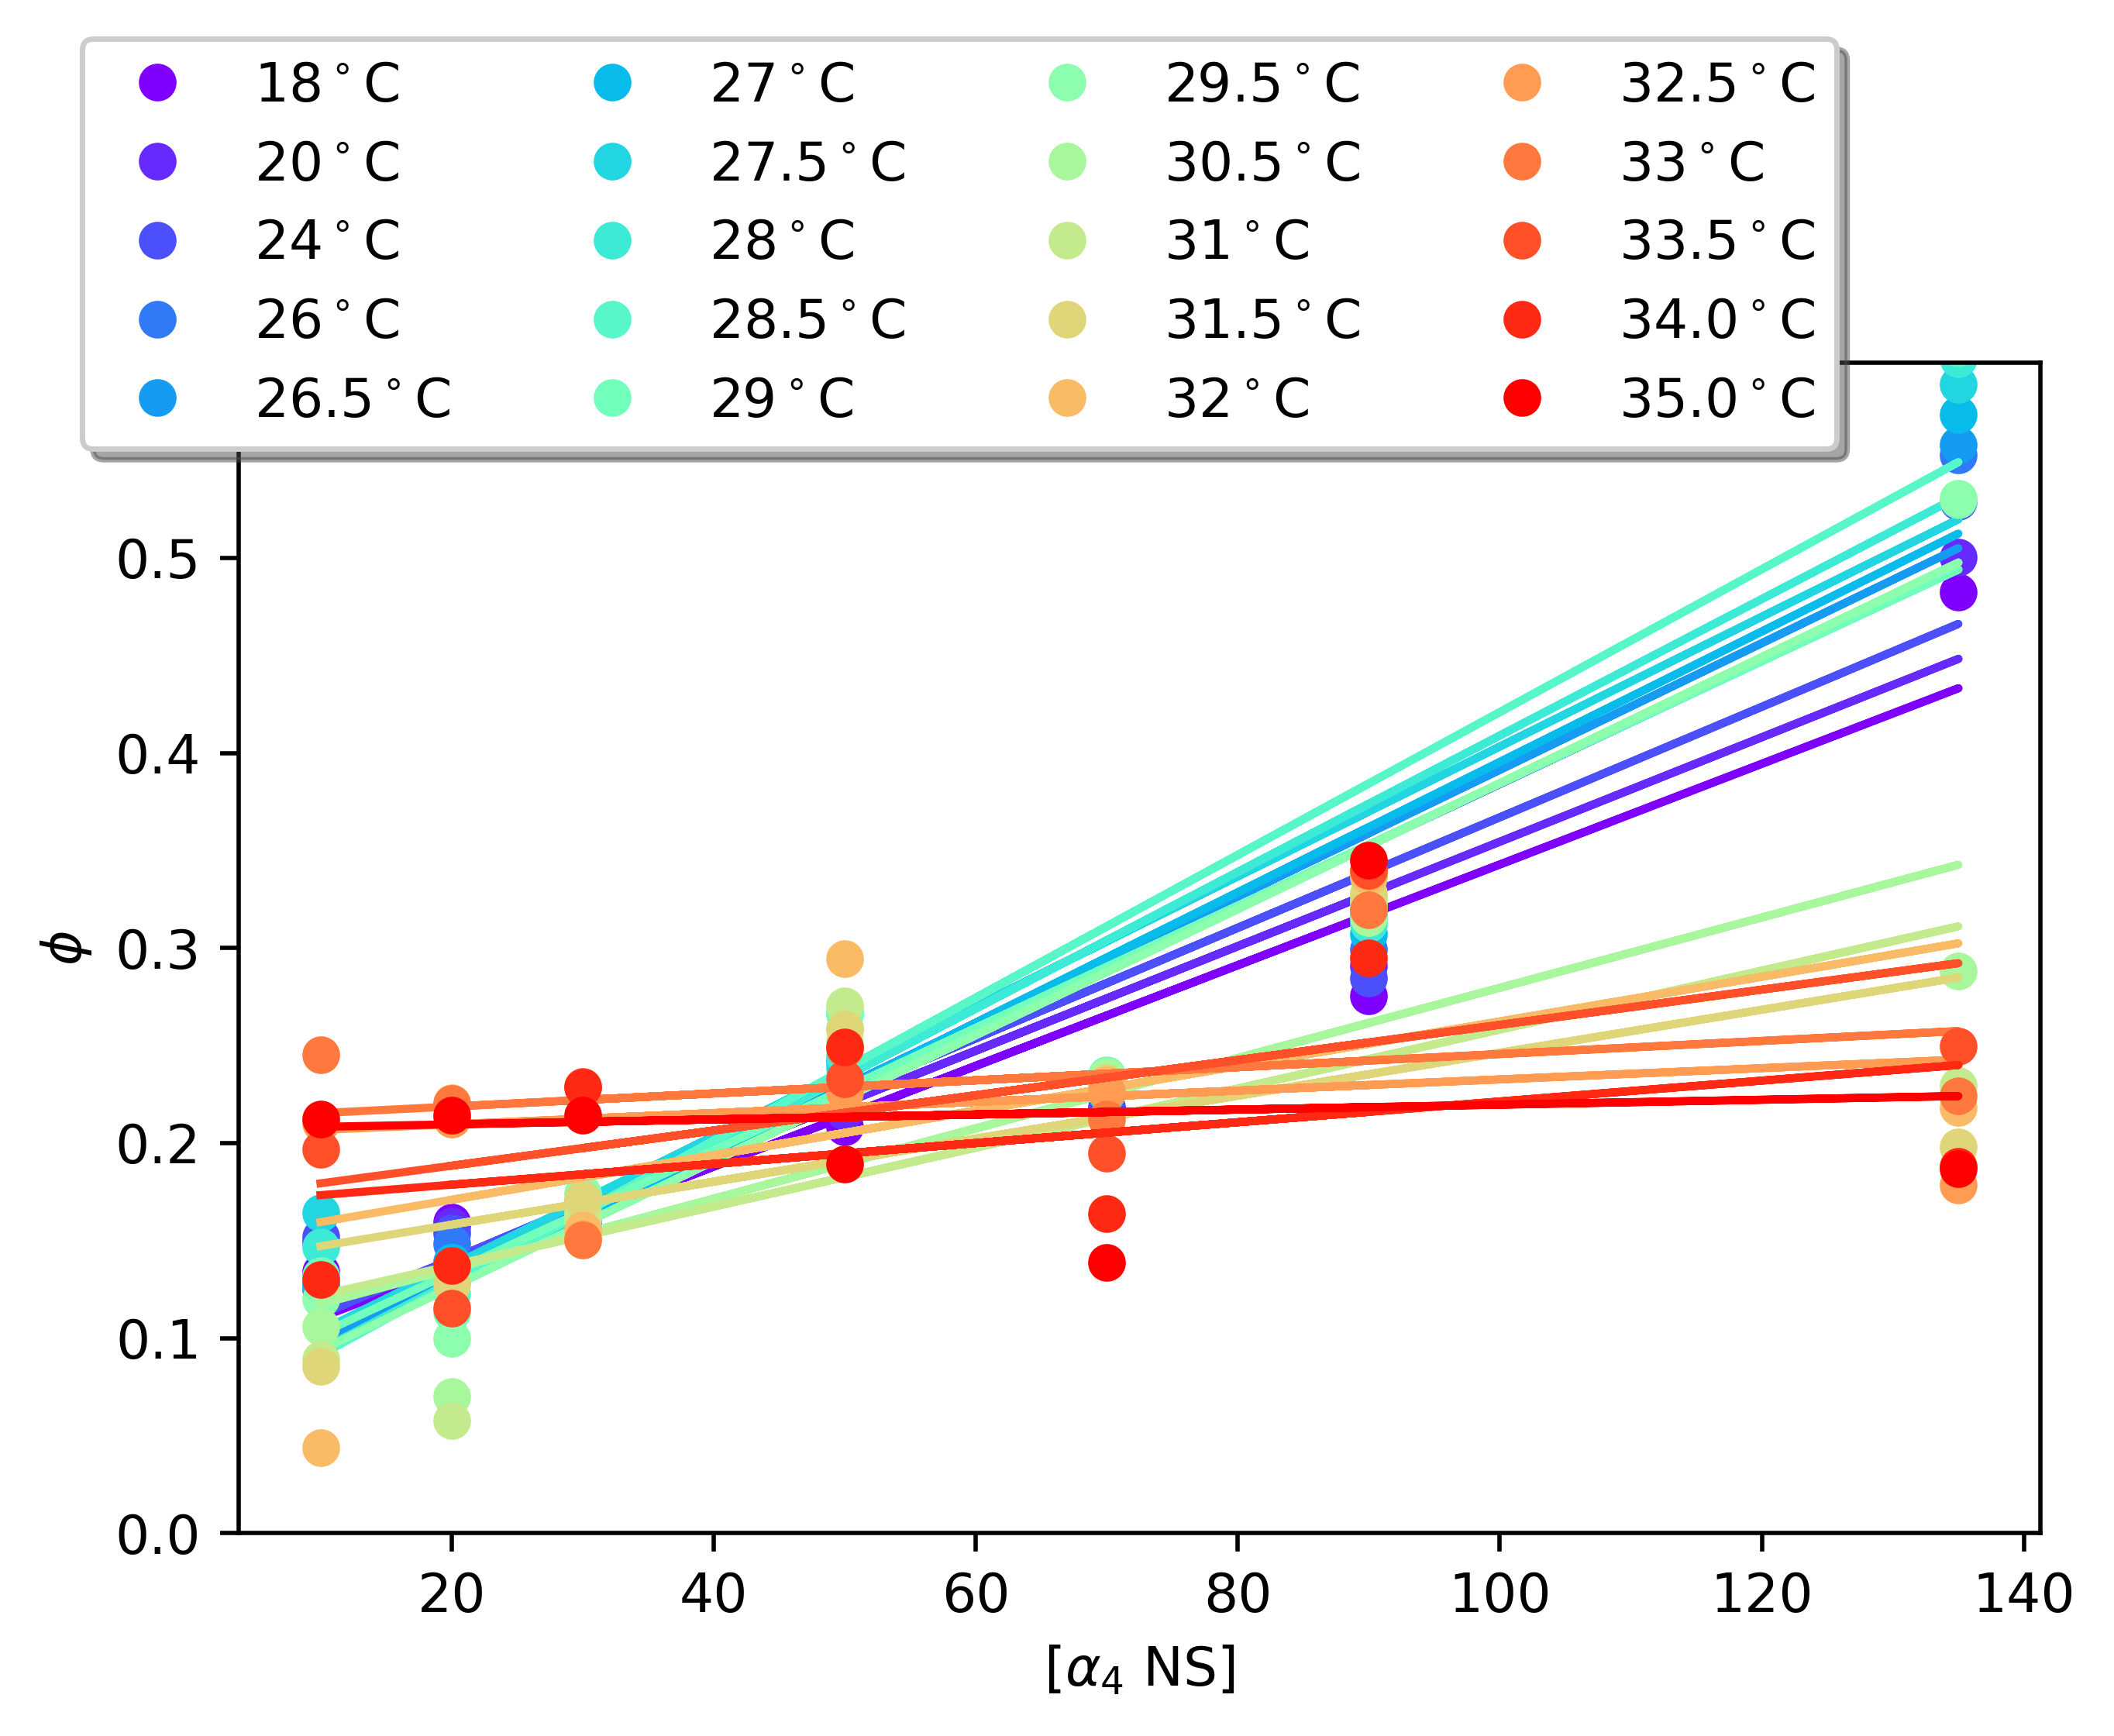

In [346]:
NS_dil_list = []
NS_den_list = []
NS_dil_uncert_list = []
NS_den_uncert_list = []


fig, ax = plt.subplots(figsize = (6, 4), dpi = 500)
ax.set_ylim([0,0.6])
ax.set_xlabel("[$\\alpha_4$ NS]")
ax.set_ylabel("$\\phi$")

color = plt.cm.rainbow(np.linspace(0, 1, len(median_vf_array_list)))

for index, median_vf_array in enumerate(median_vf_array_list):
    lin_model = lambda x, m, b: m*x + b
    popt, pcov = curve_fit(lin_model, conc_array, median_vf_array)
    m = popt[0]
    b = popt[1]
    NS_den = (1-b)/m
    NS_dil = -b/m
    mu = np.sqrt(np.diag(pcov)[0])
    bu = np.sqrt(np.diag(pcov)[1])
    NS_den_uncert = np.sqrt(np.square(-np.reciprocal(m)*bu)+np.square((-1+b)*np.reciprocal(m**2)*mu))
    NS_dil_uncert = np.sqrt(np.square(-np.reciprocal(m)*bu)+np.square((b)*np.reciprocal(m**2)*mu))
    ax.plot(conc_array, median_vf_array, linestyle ="", marker ="o", c = color[index], label = str(temp_li[index]) + "$^\\circ$C")
    ax.plot(conc_array, lin_model(conc_array, m, b), c = color[index])
    NS_dil_list.append(NS_dil)
    NS_den_list.append(NS_den)
    NS_dil_uncert_list.append(NS_dil_uncert)
    NS_den_uncert_list.append(NS_den_uncert)
    print(f"NS dil: {NS_dil}, NS den: {NS_den}")

ax.legend(loc='upper center', bbox_to_anchor=(0.4, 1.3),
          ncol=4, fancybox=True, shadow=True)
plt.savefig("lever_rules", bbox_inches = 'tight')
plt.show()

In [281]:
import scienceplots

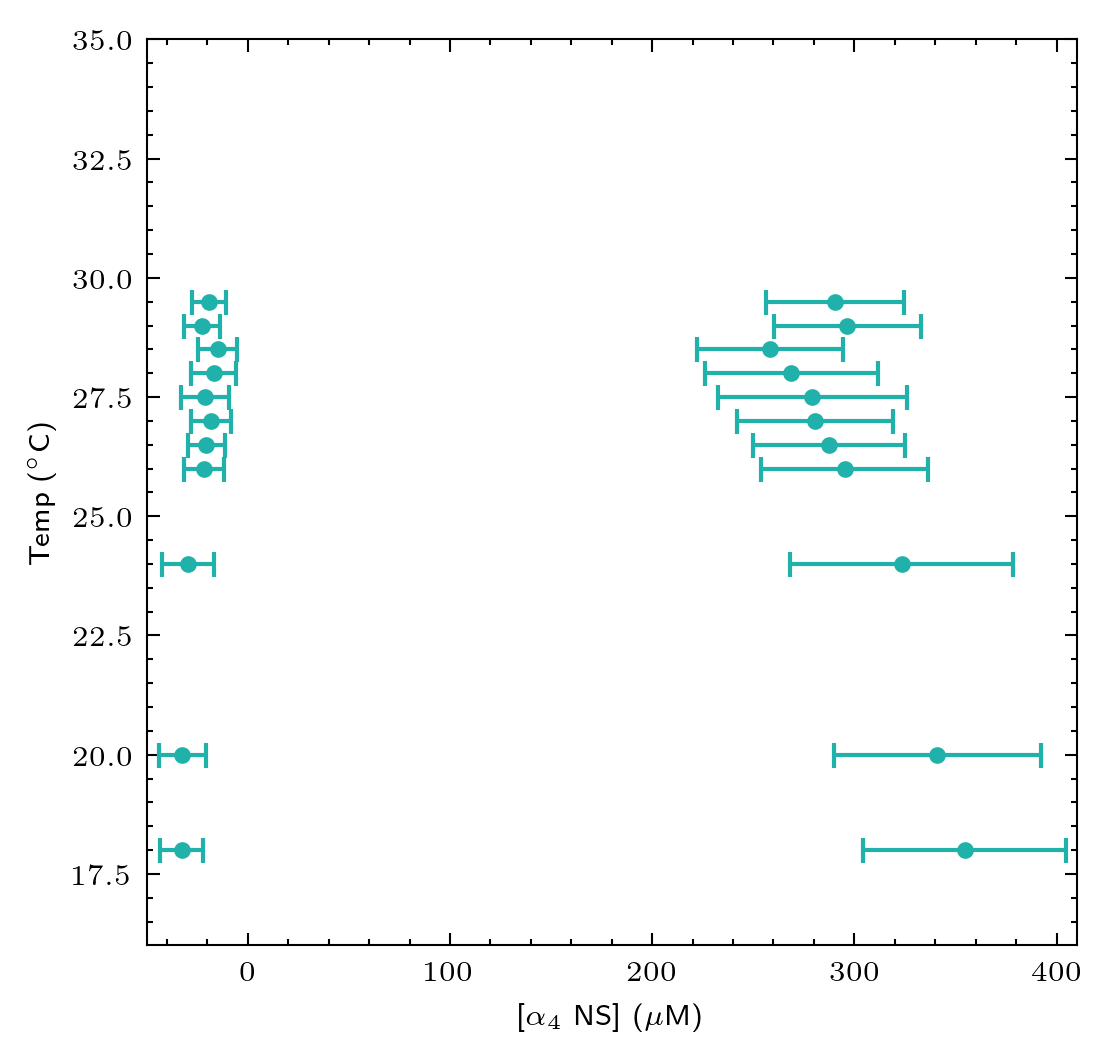

In [304]:
with plt.style.context(["science", "nature"]):
    fig, ax = plt.subplots(figsize = (4,4), dpi = 300)
    ax.errorbar(NS_dil_list[:11], temp_li[:11], xerr = NS_dil_uncert_list[:11], linestyle = "", marker = "o", color = "lightseagreen", capsize = 3)
    ax.errorbar(NS_den_list[:11], temp_li[:11], xerr = NS_den_uncert_list[:11], linestyle = "", marker = "o", color = "lightseagreen", capsize = 3)
#     ax.errorbar(NS_dil_list[11:], temp_li[11:], xerr = NS_dil_uncert_list[11:], linestyle = "", marker = "o", color ="black")
#     ax.errorbar(NS_den_list[11:], temp_li[11:], xerr = NS_den_uncert_list[11:], linestyle = "", marker = "o", color = "black")
    ax.set_xlim([-50,410])
    ax.set_ylim([16, 35])
    ax.set_xlabel("[$\\alpha_4$ NS] ($\\mu$M)")
    ax.set_ylabel("Temp ($^\circ$C)")
    plt.savefig("zoomed")

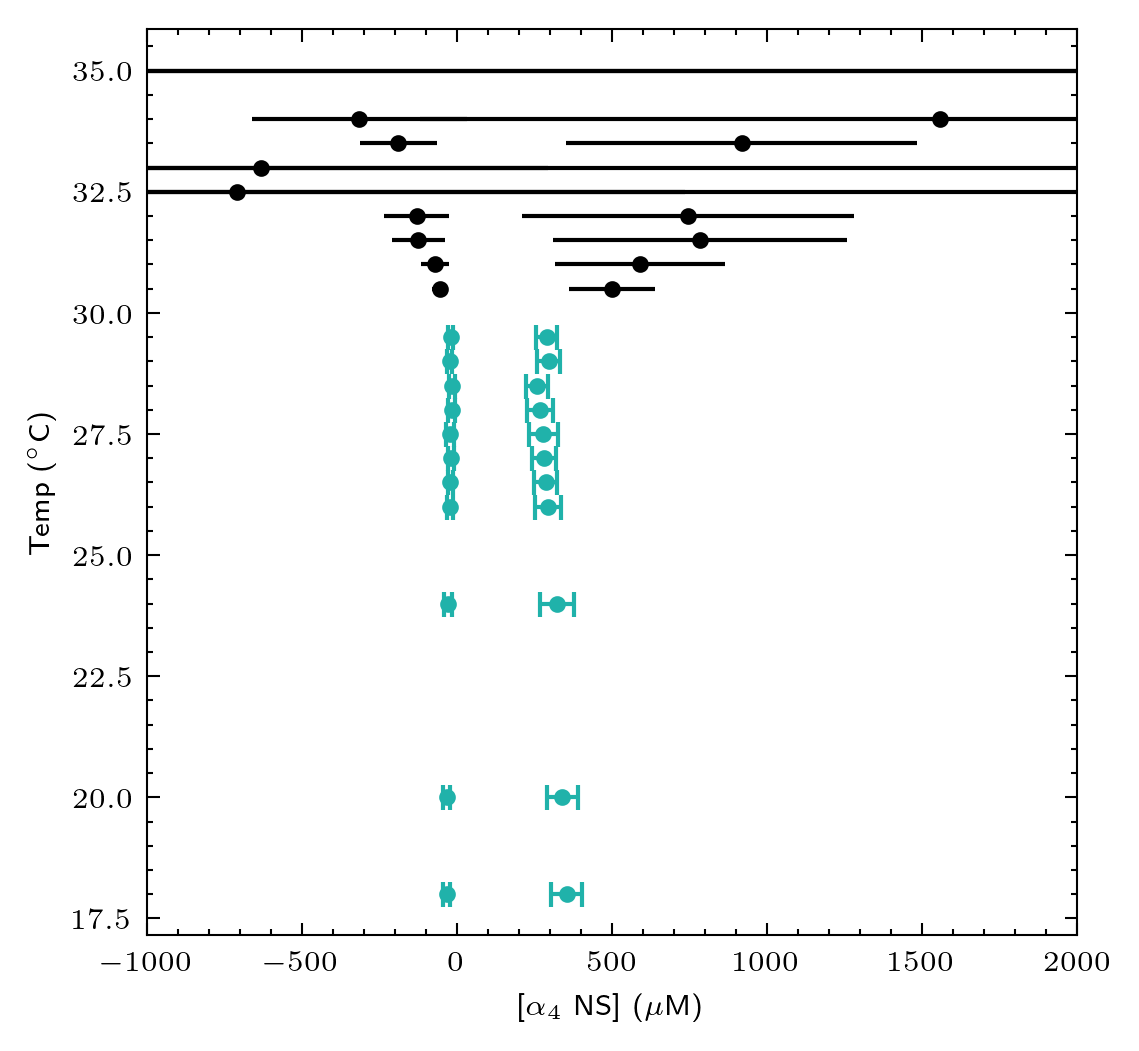

In [299]:
with plt.style.context(["science", "nature"]):
    fig, ax = plt.subplots(figsize = (4,4), dpi = 300)
    ax.errorbar(NS_dil_list[:11], temp_li[:11], xerr = NS_dil_uncert_list[:11], linestyle = "", marker = "o", color = "lightseagreen", capsize = 3)
    ax.errorbar(NS_den_list[:11], temp_li[:11], xerr = NS_den_uncert_list[:11], linestyle = "", marker = "o", color = "lightseagreen", capsize = 3)
    ax.errorbar(NS_dil_list[11:], temp_li[11:], xerr = NS_dil_uncert_list[11:], linestyle = "", marker = "o", color ="black")
    ax.errorbar(NS_den_list[11:], temp_li[11:], xerr = NS_den_uncert_list[11:], linestyle = "", marker = "o", color = "black")
    ax.set_xlabel("[$\\alpha_4$ NS] ($\\mu$M)")
    ax.set_ylabel("Temp ($^\circ$C)")
    ax.set_xlim([-1000,2000])
    plt.savefig("unzoomed")